In [5]:
import numpy as np
import tensorflow as tf
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def compute_error(predictions, target):
   
    num_predictions, height, width = predictions.shape
    costs = np.zeros(num_predictions)

    for i in range(num_predictions):
        costs[i] = np.mean((target - predictions[i, :, :]) ** 2) # / (height * width)
    return costs

def compute_cost_(y_hat, target):
    cost = tf.reduce_mean(tf.square(y_hat - target))

    return cost


In [14]:
pred = np.array([[[2,2,2,1], [9,8,7,6.5], [1,4.5,6.7, 8]]])
pd = np.array([[2,2,2,1], [9,8,7,6.5], [1,4.5,6.7, 8]])
tt = np.array([[2,1,4,5], [1,2,3,4], [8,7.7,6.7,8.9]])
g = compute_error(pred, tt)
g

array([16.94166667])

In [15]:
pred1 = tf.convert_to_tensor(pd)
tt1 = tf.convert_to_tensor(tt)
f = compute_cost_(pred1, tt1)
f.numpy()

16.941666666666666

In [93]:
def apply_simulation_parameters_mutation(individual, mutation_rate, means, std_devs, min_vals, max_vals, distribution):
 

    mut_mask = np.random.rand(2) < mutation_rate

    for i in range(2):

        if distribution == "uniform":
            individual[-1, -1, i + 3] += (np.random.uniform(low=min_vals[i], high=max_vals[i]) - individual[
                -1, -1, i + 3]) * mut_mask[i]
        elif distribution == "normal":
            individual[-1, -1, i + 3] += np.random.normal(loc=means[i], scale=std_devs[i]) * mut_mask[i]

        individual[-1, -1, i + 3] = max(min_vals[i], min(max_vals[i], individual[-1, -1, i + 3]))

    individual[-1, -1, 3:5] = np.maximum(individual[-1, -1, 3:5], 0)
    if individual[-1, -1, 3] / individual[-1, -1, 4] > 200 or individual[-1, -1, 3] / individual[-1, -1, 4] < 50:
        individual[-1, -1, 3] = 20
        individual[-1, -1, 4] = 0.2

    return individual

In [94]:
ind = np.zeros((7, 10, 10))
ind[-1, -1, :5] = [1, 1, 1, 20, 0.01]
ind[-1, -1, :5]

array([1.e+00, 1.e+00, 1.e+00, 2.e+01, 1.e-02])

In [95]:
gg = []
for _ in range(100000):
    ind = apply_simulation_parameters_mutation(ind, 0.99, (5.0, 0.5), (100.0, 2.0), (5.0, 0.1), (100.0, 1.0), "uniform")
    gg.append(ind[-1, -1, 3]/ind[-1, -1, 4])


103.8527851190773
29.600785785275992
199.99888165338717
50.00376728401145


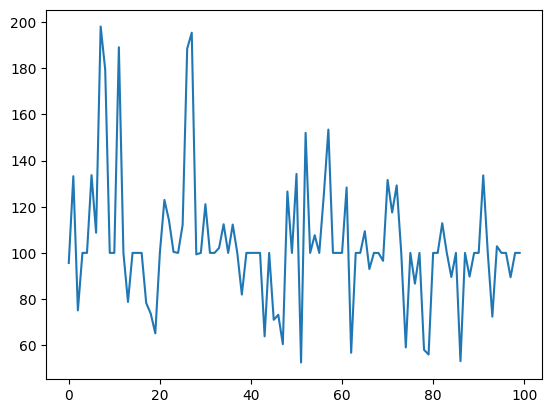

In [96]:
print(np.mean(np.array(gg)))
print(np.std(np.array(gg)))
print(np.max(np.array(gg)))
print(np.min(np.array(gg)))
zz = [gg[i] for i in range(0, 100000, 1000)]
plt.plot(zz)
plt.show()

In [97]:
gg = []
for _ in range(100000):
    ind = apply_simulation_parameters_mutation(ind, 0.99, (5.0, 0.5), (100.0, 2.0), (5.0, 0.0001), (100.0, 1.0), "normal")
    gg.append(ind[-1, -1, 3]/ind[-1, -1, 4])

99.09648654311842
14.117143614296236
199.9911917816125
50.00605173818987


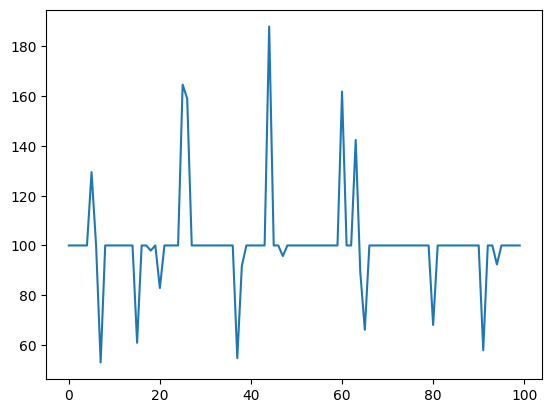

In [98]:
print(np.mean(np.array(gg)))
print(np.std(np.array(gg)))
print(np.max(np.array(gg)))
print(np.min(np.array(gg)))
zz = [gg[i] for i in range(0, 100000, 1000)]
plt.plot(zz)
plt.show()

In [137]:
def apply_compartment_mutation(individual, mutation_rate, mean, std_dev, min_val, max_val, distribution):
 
    num_species = int(individual[-1, -1, 0])
    z, y, x = individual.shape

    for i in range(1, num_species * 2, 2):
        mut_mask = np.random.rand(y, x) < mutation_rate
        #print(mut_mask)
        if distribution == "normal":
            noise = np.random.normal(loc=mean, scale=std_dev, size=(y, x))
        elif distribution == "uniform":
            noise = np.random.uniform(low=min_val, high=max_val, size=(y, x))
            # print(noise)
        individual[i, :, :] += np.where(mut_mask, noise, 0)
        #individual[i, :, :] = np.clip(individual[i, :, :], min_val, max_val)
        individual[i, :, :] = np.maximum(individual[i, :, :], 0)
        individual[i, :, :] = np.minimum(individual[i, :, :], 100)

    return individual

In [144]:
ind = np.zeros((7, 5, 5))
ind[-1, -1, :5] = [2, 1, 1, 20, 0.01]
ind = apply_compartment_mutation(ind, 0.1, 0.0, 200.0, -100, 100, "uniform")
ind[1, :, :]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [35.85125066,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [146]:
cc = []
for i in range(1000):
    ind = apply_compartment_mutation(ind, 0.01, 0.0, 200.0, -100, 100, "uniform")
    if i > 100 and i < 120:
        print(ind[1, :, :])
    #cc.append(ind[1, :, :].flatten().tolist())

[[100.         100.          97.08044893   0.           0.        ]
 [  0.          28.72229759  87.14616115  89.88755003  55.99209008]
 [  0.         100.         100.          17.92570767   0.        ]
 [ 35.22899466   0.          28.78150194   0.         100.        ]
 [  0.          75.82726583  25.44356816   0.          95.60598295]]
[[100.         100.          97.08044893   0.           0.        ]
 [  0.          28.72229759  87.14616115  89.88755003  55.99209008]
 [  0.         100.         100.          17.92570767   0.        ]
 [ 35.22899466   0.          28.78150194   0.         100.        ]
 [  0.          75.82726583  25.44356816   0.          95.60598295]]
[[100.         100.          97.08044893   0.           0.        ]
 [  0.          28.72229759  87.14616115  89.88755003  55.99209008]
 [  0.         100.         100.          17.92570767   0.        ]
 [ 35.22899466   0.          28.78150194   0.         100.        ]
 [  0.          75.82726583  25.44356816   0. 

In [150]:
ind = np.zeros((7, 5, 5))
ind[-1, -1, :5] = [2, 1, 1, 20, 0.01]
ind = apply_compartment_mutation(ind, 0.1, 0.0, 200.0, -100, 100, "normal")
ind[1, :, :]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 20.98500534],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [153]:
cc = []
for i in range(10000):
    ind = apply_compartment_mutation(ind, 0.01, 0.0, 100.0, -100, 100, "normal")
    if i > 9990:
        print(ind[1, :, :])

[[ 10.65357287   0.62381602 100.           0.         100.        ]
 [  0.         100.           0.         100.           0.        ]
 [  5.12500489   0.         100.           0.           0.        ]
 [  0.         100.         100.         100.          17.66003379]
 [ 35.72272203   0.         100.         100.          96.25841976]]
[[ 10.65357287   0.62381602 100.           0.         100.        ]
 [  0.         100.           0.         100.           0.        ]
 [  0.           0.         100.           0.           0.        ]
 [  0.         100.         100.         100.          17.66003379]
 [ 35.72272203   0.         100.         100.          96.25841976]]
[[ 10.65357287   0.62381602 100.           0.         100.        ]
 [  0.         100.           0.         100.           0.        ]
 [  0.           0.         100.           0.           0.        ]
 [  0.         100.         100.         100.          17.66003379]
 [ 35.72272203   0.         100.         100. 

In [212]:
def apply_parameters_mutation(individual, mutation_rate, species_means, species_std_devs,
                             species_min_vals, species_max_vals, complex_means, complex_std_devs,
                             complex_min_vals, complex_max_vals, distribution):

    num_species = int(individual[-1, -1, 0])
    num_pairs = int(individual[-1, -1, 1])
    pair_start = num_species * 2
    pair_stop = pair_start + (num_pairs * 2)

    count = 0
    for i in range(0, num_species * 2, 2):
        mut_mask = np.random.rand(3) < mutation_rate
        if distribution == "normal":
            for j in range(3):
                individual[-1, i, j] += np.random.normal(loc=species_means[count], scale=species_std_devs[count]) * \
                                        mut_mask[j]
        elif distribution == "uniform":
            for j in range(3):
                individual[-1, i, j] += (np.random.uniform(low=species_min_vals[count], high=species_max_vals[count]) -
                                         individual[-1, i, j]) * mut_mask[j]
                
        individual[-1, i, 2] = np.minimum(individual[-1, i, 2], 30)
        individual[-1, i, 0:2] = np.minimum(individual[-1, i, 0:2], 10)
        individual[-1, i, :3] = np.maximum(individual[-1, i, :3], np.random.rand())
        count += 1

    count = 0
    for i in range(pair_start + 1, pair_stop, 2):
        mut_mask = np.random.rand(4) < mutation_rate
        if distribution == "normal":
            for j in range(4):
                individual[i, 1, j] += np.random.normal(loc=complex_means[count], scale=complex_std_devs[count]) * \
                                       mut_mask[j]
        elif distribution == "uniform":
            for j in range(4):
                individual[i, 1, j] += (np.random.uniform(low=complex_min_vals[count], high=complex_max_vals[count]) -
                                        individual[i, 1, j]) * mut_mask[j]
    
        individual[i, 1, 1:3] = np.minimum(individual[i, 1, 1:3], 10)
        individual[i, 1, 0] = np.minimum(individual[i, 1, 0], 200)
        individual[i, 1, 3] = np.minimum(individual[i, 1, 3], 50)
        individual[i, 1, :4] = np.maximum(individual[i, 1, :4], np.random.rand())
        count += 1
    

    return individual

In [213]:
ind = np.zeros((7, 5, 5))
ind[-1, -1, :5] = [2, 1, 1, 20, 0.01]
ind[-1, 0, :3] = [0.1, 0.2, 0.3]
ind[-1, 2, :3] = [0.1, 0.2, 0.3]
ind[-2, 1, :4] = [0.1, 0.2, 0.3, .9]

In [214]:

for i in range(1000):
    ind = apply_parameters_mutation(
        individual=ind, 
        mutation_rate=0.99,
        species_means=(0.5, 0.1, 1.0),
        species_std_devs=(10.0, 5.0, 10.0),
        species_min_vals=(-5, -2, -10),
        species_max_vals=(5, 2, 10),
        complex_means=(3, 0.1, 0.1, 1.0),
        complex_std_devs=(100.0, 10.0, 5.0, 10.0),
        complex_min_vals=(-100, -10, -10, -10),
        complex_max_vals=(100, 10, 10, 10),
        distribution="uniform"
    )
    if i > 980:
        print(ind[-1, 0, :3])
        print(ind[-1, 2, :3])
        print(ind[-2, 1, :4])
        print("----------------------")

[0.78979761 1.75986227 2.77865622]
[0.66616008 0.96371473 0.66616008]
[ 0.02040056 10.          0.02040056  0.11561771]
----------------------
[1.1790797  2.64704174 3.42677537]
[0.9260725 0.9260725 0.9260725]
[ 5.78306967  0.59339269  0.59339269 13.15360894]
----------------------
[0.71919027 4.89180503 3.91614251]
[0.30212813 0.30212813 0.30212813]
[ 0.27576586  0.27576586  0.27576586 50.        ]
----------------------
[4.58370445 0.12286365 0.12286365]
[0.84934953 0.61572506 0.61572506]
[0.43146622 0.43146622 0.43146622 0.43146622]
----------------------
[1.90168404 0.64974644 0.64974644]
[0.86314467 0.86314467 0.86314467]
[ 0.97523142 10.         10.         36.99499172]
----------------------
[0.94887313 0.94887313 3.93604997]
[0.16048895 1.14862757 1.05582668]
[0.90962706 0.90962706 0.90962706 0.90962706]
----------------------
[1.25279351 1.03505746 1.70551546]
[0.5076017  1.9852427  1.17270943]
[ 0.5841908 10.         0.5841908  0.5841908]
----------------------
[0.5721959  0.

In [215]:
ind = np.zeros((7, 5, 5))
ind[-1, -1, :5] = [2, 1, 1, 20, 0.01]
ind[-1, 0, :3] = [0.1, 0.2, 0.3]
ind[-1, 2, :3] = [0.1, 0.2, 0.3]
ind[-2, 1, :4] = [0.1, 0.2, 0.3, .9]

In [216]:
for i in range(1000):
    ind = apply_parameters_mutation(
        individual=ind, 
        mutation_rate=0.99,
        species_means=(0.0, 0.0, 0.0),
        species_std_devs=(10.0, 5.0, 10.0),
        species_min_vals=(-5, -2, -10),
        species_max_vals=(5, 2, 10),
        complex_means=(0.0, 0.0, 0.0, 0.0),
        complex_std_devs=(100.0, 10.0, 5.0, 10.0),
        complex_min_vals=(-100, -10, -10, -10),
        complex_max_vals=(100, 10, 10, 10),
        distribution="normal"
    )
    if i < 100:
        print(ind[-1, 0, :3])
        print(ind[-1, 2, :3])
        print(ind[-2, 1, :4])
        print("----------------------")

[10.          2.40288341  0.56581515]
[0.48700412 0.48700412 3.18938197]
[39.47133396 10.         10.          0.06615549]
----------------------
[1.00000000e+01 8.95117063e-03 1.14992089e+01]
[0.86387043 0.86387043 4.74942056]
[154.51825136  10.           2.11182815   5.53346246]
----------------------
[ 9.37317604  0.12836681 19.64800146]
[0.81977556 0.37754043 7.53548289]
[60.02512693  0.48008452  0.48008452  0.48008452]
----------------------
[0.91699822 6.33783829 5.01590247]
[0.04320891 0.04320891 9.89073842]
[0.35627648 0.35627648 0.35627648 0.35627648]
----------------------
[ 5.25932527  7.56743673 17.62203617]
[1.64749668 3.55356301 9.32346862]
[51.43458496  0.72925878 10.          0.72925878]
----------------------
[10.          9.54699476 18.9429864 ]
[3.31988814 0.47389876 0.47389876]
[83.96941982  0.20240289  0.20240289 50.        ]
----------------------
[2.14880135 9.99455237 9.50805341]
[0.37937076 0.37937076 0.37937076]
[86.03221221  0.66371399 10.          0.66371399

In [3]:
def apply_diffusion(current_concentration, compartment, column_position, diffusion_rate, time_step):
 
    compartment_size = compartment.shape[1]
    temporary_concentration = tf.identity(current_concentration)

    if column_position == 0:

        temporary_concentration = tf.tensor_scatter_nd_update(
            tensor=temporary_concentration,
            indices=[[0]],
            updates=update_upper_left_corner_concentration(
                cell_concentration=current_concentration[0],
                lower_cell_concentration=compartment[1, 0],
                right_cell_concentration=compartment[0, 1],
                diffusion_rate=diffusion_rate,
                time_step=time_step
            )
        )

        temporary_concentration = tf.tensor_scatter_nd_update(
            tensor=temporary_concentration,
            indices=[[compartment_size-1]],
            updates=update_lower_left_corner_concentration(
                cell_concentration=current_concentration[compartment_size-1],
                upper_cell_concentration=compartment[-2, 0],
                right_cell_concentration=compartment[-1, 1],
                diffusion_rate=diffusion_rate,
                time_step=time_step
            )
        )

        temporary_concentration = tf.tensor_scatter_nd_update(
            tensor=temporary_concentration,
            indices=list([i] for i in range(1, compartment_size - 1)),
            updates=update_left_side_concentration(
                cell_concentration=current_concentration[1:-1],
                upper_cell_concentration=compartment[:-2, 0],
                lower_cell_concentration=compartment[2:, 0],
                right_cell_concentration=compartment[1:-1, 1],
                diffusion_rate=diffusion_rate,
                time_step=time_step
            )
        )

    elif column_position == compartment_size - 1:

        temporary_concentration = tf.tensor_scatter_nd_update(
            tensor=temporary_concentration,
            indices=[[0]],
            updates=update_upper_right_corner_concentration(
                cell_concentration=current_concentration[0],
                lower_cell_concentration=compartment[1, -1],
                left_cell_concentration=compartment[0, -2],
                diffusion_rate=diffusion_rate,
                time_step=time_step
            )
        )

        temporary_concentration = tf.tensor_scatter_nd_update(
            tensor=temporary_concentration,
            indices=[[compartment_size-1]],
            updates=update_lower_right_corner_concentration(
                cell_concentration=current_concentration[-1],
                upper_cell_concentration=compartment[-2, -1],
                left_cell_concentration=compartment[-1, -2],
                diffusion_rate=diffusion_rate,
                time_step=time_step
            )
        )

        temporary_concentration = tf.tensor_scatter_nd_update(
            tensor=temporary_concentration,
            indices=list([i] for i in range(1, compartment_size - 1)),
            updates=update_right_side_concentration(
                cell_concentration=current_concentration[1:-1],
                upper_cell_concentration=compartment[0:-2, -1],
                lower_cell_concentration=compartment[2:, -1],
                left_cell_concentration=compartment[1:-1, -2],
                diffusion_rate=diffusion_rate,
                time_step=time_step
            )
        )

    else:
        temporary_concentration = tf.tensor_scatter_nd_update(
            tensor=temporary_concentration,
            indices=[[0]],
            updates=update_central_concentration_upper(
                cell_concentration=current_concentration[0],
                lower_cell_concentration=compartment[1, column_position],
                right_cell_concentration=compartment[0, column_position + 1],
                left_cell_concentration=compartment[0, column_position - 1],
                diffusion_rate=diffusion_rate,
                time_step=time_step
            )
        )

        temporary_concentration = tf.tensor_scatter_nd_update(
            tensor=temporary_concentration,
            indices=[[compartment_size-1]],
            updates=update_central_concentration_lower(
                cell_concentration=current_concentration[compartment_size-1],
                upper_cell_concentration=compartment[-2, column_position],
                right_cell_concentration=compartment[-1, column_position+1],
                left_cell_concentration=compartment[-1, column_position-1],
                diffusion_rate=diffusion_rate,
                time_step=time_step
            )
        )

        temporary_concentration = tf.tensor_scatter_nd_update(
            tensor=temporary_concentration,
            indices=list([i] for i in range(1, compartment_size-1)),
            updates=update_central_concentration_middle(
                cell_concentration=current_concentration[1: compartment_size-1],
                upper_cell_concentration=compartment[0:-2, column_position],
                lower_cell_concentration=compartment[2:, column_position],
                right_cell_concentration=compartment[1:-1, column_position+1],
                left_cell_concentration=compartment[1:-1, column_position-1],
                diffusion_rate=diffusion_rate,
                time_step=time_step
            )
        )

    updated_concentration = tf.maximum(temporary_concentration, 0.0)

    return updated_concentration



def update_lower_left_corner_concentration(
    cell_concentration,
    upper_cell_concentration,
    right_cell_concentration,
    diffusion_rate,
    time_step
):
  
    in_diffusion = (time_step * upper_cell_concentration * diffusion_rate) + \
                   (time_step * right_cell_concentration * diffusion_rate)
    out_diffusion = time_step * cell_concentration * diffusion_rate * 2

    updated_concentration = cell_concentration + in_diffusion - out_diffusion
    updated_concentration = tf.reshape(tensor=updated_concentration, shape=(1,))

    return updated_concentration



def update_lower_right_corner_concentration(
    cell_concentration,
    upper_cell_concentration,
    left_cell_concentration,
    diffusion_rate,
    time_step
):
  
    in_diffusion = (time_step * upper_cell_concentration * diffusion_rate) + \
                   (time_step * left_cell_concentration * diffusion_rate)
    out_diffusion = time_step * cell_concentration * diffusion_rate * 2

    updated_concentration = cell_concentration + in_diffusion - out_diffusion
    updated_concentration = tf.reshape(tensor=updated_concentration, shape=(1,))

    return updated_concentration



def update_upper_left_corner_concentration(
    cell_concentration,
    lower_cell_concentration,
    right_cell_concentration,
    diffusion_rate,
    time_step
):

    in_diffusion = (time_step * lower_cell_concentration * diffusion_rate) + \
                   (time_step * right_cell_concentration * diffusion_rate)
    out_diffusion = time_step * cell_concentration * diffusion_rate * 2

    updated_concentration = cell_concentration + in_diffusion - out_diffusion
    updated_concentration = tf.reshape(tensor=updated_concentration, shape=(1,))

    return updated_concentration



def update_upper_right_corner_concentration(
    cell_concentration,
    lower_cell_concentration,
    left_cell_concentration,
    diffusion_rate,
    time_step
):
  
    in_diffusion = (time_step * lower_cell_concentration * diffusion_rate) + \
                   (time_step * left_cell_concentration * diffusion_rate)
    out_diffusion = time_step * cell_concentration * diffusion_rate * 2

    updated_concentration = cell_concentration + in_diffusion - out_diffusion
    updated_concentration = tf.reshape(tensor=updated_concentration, shape=(1,))

    return updated_concentration




def update_left_side_concentration(
    cell_concentration,
    upper_cell_concentration,
    lower_cell_concentration,
    right_cell_concentration,
    diffusion_rate,
    time_step
):

    upper_cell_in = time_step * upper_cell_concentration * diffusion_rate
    lower_cell_in = time_step * lower_cell_concentration * diffusion_rate
    right_cell_in = time_step * right_cell_concentration * diffusion_rate

    in_diffusion = upper_cell_in + lower_cell_in + right_cell_in
    out_diffusion = time_step * cell_concentration * diffusion_rate * 3

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration




def update_right_side_concentration(
        cell_concentration,
        upper_cell_concentration,
        lower_cell_concentration,
        left_cell_concentration,
        diffusion_rate,
        time_step
):
  
    upper_cell_in = time_step * upper_cell_concentration * diffusion_rate
    lower_cell_in = time_step * lower_cell_concentration * diffusion_rate
    right_cell_in = time_step * left_cell_concentration * diffusion_rate

    in_diffusion = upper_cell_in + lower_cell_in + right_cell_in
    out_diffusion = time_step * cell_concentration * diffusion_rate * 3
    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration



def update_central_concentration_middle(
        cell_concentration,
        upper_cell_concentration,
        lower_cell_concentration,
        right_cell_concentration,
        left_cell_concentration,
        diffusion_rate,
        time_step
):
   
    upper_cell_in = time_step * upper_cell_concentration * diffusion_rate
    lower_cell_in = time_step * lower_cell_concentration * diffusion_rate
    right_cell_in = time_step * right_cell_concentration * diffusion_rate
    left_cell_in = time_step * left_cell_concentration * diffusion_rate

    in_diffusion = upper_cell_in + lower_cell_in + right_cell_in + left_cell_in
    out_diffusion = time_step * cell_concentration * diffusion_rate * 4

    updated_concentration = cell_concentration + in_diffusion - out_diffusion

    return updated_concentration



def update_central_concentration_upper(
        cell_concentration,
        lower_cell_concentration,
        right_cell_concentration,
        left_cell_concentration,
        diffusion_rate,
        time_step
):
  
    lower_cell_in = time_step * lower_cell_concentration * diffusion_rate
    right_cell_in = time_step * right_cell_concentration * diffusion_rate
    left_cell_in = time_step * left_cell_concentration * diffusion_rate

    in_diffusion = lower_cell_in + right_cell_in + left_cell_in
    out_diffusion = time_step * cell_concentration * diffusion_rate * 3

    updated_concentration = cell_concentration + in_diffusion - out_diffusion
    updated_concentration = tf.reshape(tensor=updated_concentration, shape=(1,))

    return updated_concentration




def update_central_concentration_lower(
        cell_concentration,
        upper_cell_concentration,
        right_cell_concentration,
        left_cell_concentration,
        diffusion_rate,
        time_step
):
  
    upper_cell_in = time_step * upper_cell_concentration * diffusion_rate
    right_cell_in = time_step * right_cell_concentration * diffusion_rate
    left_cell_in = time_step * left_cell_concentration * diffusion_rate

    in_diffusion = upper_cell_in + right_cell_in + left_cell_in
    out_diffusion = time_step * cell_concentration * diffusion_rate * 3

    updated_concentration = cell_concentration + in_diffusion - out_diffusion
    updated_concentration = tf.reshape(tensor=updated_concentration, shape=(1,))

    return updated_concentration

def apply_component_production(initial_concentration, production_pattern, production_rate, time_step):
   

    updated_concentration = tf.maximum(initial_concentration + (production_pattern * production_rate * time_step), 0.0)

    return updated_concentration



def apply_component_degradation(initial_concentration, degradation_rate, time_step):
 
    updated_concentration = tf.maximum(initial_concentration - (initial_concentration * degradation_rate * time_step), 0.0)

    return updated_concentration





def apply_species_collision(species1, species2, complex_, collision_rate, time_step):
  
    collision_effect = collision_rate * time_step
    complex_formed =tf.minimum(species1 * collision_effect, species2 * collision_effect)

    updated_species1 = tf.maximum(species1 - complex_formed, 0.0)
    updated_species2 = tf.maximum(species2 - complex_formed, 0.0)
    updated_complex = tf.maximum(complex_ + complex_formed, 0.0)

    return updated_species1, updated_species2, updated_complex



def apply_complex_dissociation(species1, species2, complex_, dissociation_rate, time_step):
   
    dissociation_effect = dissociation_rate * time_step
    dissociated_amount = complex_ * dissociation_effect

    updated_complex = tf.maximum(complex_ - dissociated_amount, 0.0)
    updated_species1 = tf.maximum(species1 + dissociated_amount, 0.0)
    updated_species2 = tf.maximum(species2 + dissociated_amount, 0.0)

    return updated_species1, updated_species2, updated_complex



def tensor_simulation(individual, parameters, num_species, num_pairs, stop, time_step, max_epoch):

    z, y, x = individual.shape  # z: species (including complexes), (y, x): compartment shape
    num_iters = int(x)  # Number of iterations in each epoch (equal to x)
    num_epochs = int(stop / time_step)  # Total number of epochs
    pair_start = int(num_species * 2)  # Starting index for species pairs
    pair_stop = int(pair_start + (num_pairs * 2))  # Ending index for species pairs

    epoch = 0
    while epoch <= max_epoch or epoch <= num_epochs:

        for i in range(num_iters):

            # Update species production
            for j in range(0, num_species * 2, 2):

                individual = tf.tensor_scatter_nd_update(
                    tensor=individual,
                    indices=list([j, k, i] for k in range(y)),
                    updates=apply_component_production(
                        initial_concentration=individual[j, :, i],
                        production_pattern=individual[j + 1, :, i],
                        production_rate=parameters[f"species_{int((j / 2) + 1)}"][0],
                        time_step=time_step
                    )
                )

            # Handle species collision
            for j in range(pair_start, pair_stop, 2):

                species1_idx = int(individual[j + 1, 0, 0])
                species2_idx = int(individual[j + 1, 0, 1])

                updated_species1, updated_species2, updated_complex = apply_species_collision(
                    species1=individual[species1_idx, :, i],
                    species2=individual[species2_idx, :, i],
                    complex_=individual[j, :, i],
                    collision_rate=parameters[f"pair_{int((j / 2) - num_species + 1)}"][0],
                    time_step=time_step
                )

                individual = tf.tensor_scatter_nd_update(
                    tensor=individual,
                    indices=list([species1_idx, k, i] for k in range(y)),
                    updates=updated_species1
                )
                individual = tf.tensor_scatter_nd_update(
                    tensor=individual,
                    indices=list([species2_idx, k, i] for k in range(y)),
                    updates=updated_species2
                )
                individual = tf.tensor_scatter_nd_update(
                    tensor=individual,
                    indices=list([j, k, i] for k in range(y)),
                    updates=updated_complex
                )


            # Update species degradation
            for j in range(0, num_species * 2, 2):

                individual = tf.tensor_scatter_nd_update(
                    tensor=individual,
                    indices=list([j, k, i] for k in range(y)),
                    updates=apply_component_degradation(
                        initial_concentration=individual[j, :, i],
                        degradation_rate=parameters[f"species_{int((j / 2) + 1)}"][1],
                        time_step=time_step
                    )
                )


            # Handle complex degradation
            for j in range(pair_start, pair_stop, 2):


                individual = tf.tensor_scatter_nd_update(
                    tensor=individual,
                    indices=list([j, k, i] for k in range(y)),
                    updates=apply_component_degradation(
                        initial_concentration=individual[j, :, i],
                        degradation_rate=parameters[f"pair_{int((j / 2) - num_species + 1)}"][2],
                        time_step=time_step
                    )
                )


            # Handle complex dissociation
            for j in range(pair_start, pair_stop, 2):

                species1_idx = int(individual[j + 1, 0, 0])
                species2_idx = int(individual[j + 1, 0, 1])

                updated_species1, updated_species2, updated_complex = apply_complex_dissociation(
                    species1=individual[species1_idx, :, i],
                    species2=individual[species2_idx, :, i],
                    complex_=individual[j, :, i],
                    dissociation_rate=parameters[f"pair_{int((j / 2) - num_species + 1)}"][1],
                    time_step=time_step
                )

                individual = tf.tensor_scatter_nd_update(
                    tensor=individual,
                    indices=list([species1_idx, k, i] for k in range(y)),
                    updates=updated_species1
                )
                individual = tf.tensor_scatter_nd_update(
                    tensor=individual,
                    indices=list([species2_idx, k, i] for k in range(y)),
                    updates=updated_species2
                )
                individual = tf.tensor_scatter_nd_update(
                    tensor=individual,
                    indices=list([j, k, i] for k in range(y)),
                    updates=updated_complex
                )


            # Update species diffusion
            for j in range(0, num_species * 2, 2):

                individual = tf.tensor_scatter_nd_update(
                    tensor=individual,
                    indices=list([j, k, i] for k in range(y)),
                    updates=apply_diffusion(
                        current_concentration=individual[j, :, i],
                        compartment=individual[j, :, :],
                        column_position=i,
                        diffusion_rate=parameters[f"species_{int((j / 2) + 1)}"][2],
                        time_step=time_step
                    )
                )


            # Handle complex diffusion
            for j in range(pair_start, pair_stop, 2):

                individual = tf.tensor_scatter_nd_update(
                    tensor=individual,
                    indices=list([j, k, i] for k in range(y)),
                    updates=apply_diffusion(
                        current_concentration=individual[j, :, i],
                        compartment=individual[j, :, :],
                        column_position=i,
                        diffusion_rate=parameters[f"pair_{int((j / 2) - num_species + 1)}"][3],
                        time_step=time_step
                    )
                )

        epoch += 1


    return individual[0, :, :]

In [52]:
class GradientOptimization:
  

    def __init__(self, epochs, learning_rate, target, param_opt, compartment_opt, cost_alpha, cost_beta,
                 cost_kernel_size, weight_decay):

        self.epochs = epochs
        self.learning_rate = learning_rate
        self.target = target
        self.param_opt = param_opt
        self.compartment_opt = compartment_opt
        self.cost_alpha = cost_alpha
        self.cost_beta = cost_beta
        self.cost_kernel_size = cost_kernel_size
        self.weight_decay = weight_decay
        

    def parameter_extraction(self, individual, compartment_opt):
    
        parameters = {}
        num_species = int(individual[-1, -1, 0])
        num_pairs = int(individual[-1, -1, 1])
        max_epoch = int(individual[-1, -1, 2])
        stop = int(individual[-1, -1, 3])
        time_step = individual[-1, -1, 4]
        pair_start = int(num_species * 2)
        pair_stop = int(pair_start + (num_pairs * 2))


        species = 1
        for i in range(0, num_species * 2, 2):
            parameters[f"species_{species}"] = tf.Variable(individual[-1, i, 0:3], trainable=True)
            species += 1

        pair = 1
        for j in range(pair_start + 1, pair_stop + 1, 2):
            parameters[f"pair_{pair}"] = tf.Variable(individual[j, 1, :4], trainable=True)
            pair += 1

        if compartment_opt:
            sp = 1
            for k in range(1, num_species * 2, 2):
                compartment = tf.Variable(individual[k, :, :], trainable=True)
                parameters[f'compartment_{sp}'] = compartment
                sp += 1

        return parameters, num_species, num_pairs, max_epoch, stop, time_step



    def update_parameters(self, individual, parameters, param_opt, compartment_opt):
     
        num_species = int(individual[-1, -1, 0])
        num_pairs = int(individual[-1, -1, 1])
        pair_start = int(num_species * 2)

        # Update species and pairs parameters
        if param_opt:
            # Update species parameters
            for species in range(1, num_species + 1):
                i = (species - 1) * 2
                individual = tf.tensor_scatter_nd_update(
                    individual,
                    indices=tf.constant([[individual.shape[0] - 1, i, k] for k in range(3)], dtype=tf.int32),
                    updates=parameters[f"species_{species}"]
                )

            # Update pair parameters
            for pair in range(1, num_pairs + 1):
                j = pair_start + (pair - 1) * 2 + 1
                individual = tf.tensor_scatter_nd_update(
                    individual,
                    indices=tf.constant([[j, 1, k] for k in range(4)], dtype=tf.int32),
                    updates=parameters[f"pair_{pair}"]
                )

        # Update initial conditions
        if compartment_opt:
            sp = 1
            for i in range(1, num_species * 2, 2):
                indices_ = []
                updates = tf.reshape(parameters[f"compartment_{sp}"], [-1])
                for row in range(individual[0, :, :].shape[0]):
                    for col in range(individual[0, :, :].shape[1]):
                        indices_.append([i, row, col])

                individual = tf.tensor_scatter_nd_update(
                    individual,
                    indices=indices_,
                    updates=updates
                )
                sp += 1

        return individual

    def simulation(self, individual, parameters, num_species, num_pairs, stop, time_step, max_epoch):
       
        y_hat = tensor_simulation(
            individual=individual,
            parameters=parameters,
            num_species=num_species,
            num_pairs=num_pairs,
            stop=stop,
            time_step=time_step,
            max_epoch=max_epoch
        )

        return y_hat

    def compute_cost_(self, y_hat, target):

        cost = tf.reduce_mean(tf.square(y_hat - target))

        return cost

    def gradient_optimization(self, individual):
        
        costs = []
        parameters, num_species, num_pairs, max_epoch, stop, time_step = self.parameter_extraction(
            individual=individual,
            compartment_opt=self.compartment_opt
        )
        optimizer = tf.keras.optimizers.Adam(
            learning_rate=self.learning_rate,
            weight_decay=self.weight_decay
        )

        for i in range(self.epochs):
            with tf.GradientTape() as tape:
                y_hat = self.simulation(
                    individual=individual,
                    parameters=parameters,
                    num_species=num_species,
                    num_pairs=num_pairs,
                    stop=stop,
                    time_step=time_step,
                    max_epoch=max_epoch
                )

                cost = self.compute_cost_(
                    y_hat=y_hat,
                    target=self.target
                )

                costs.append(cost.numpy())

            print(f"Epoch {i + 1}/{self.epochs}, Cost: {cost.numpy()}")
            variables = list(parameters.values())
            gradients = tape.gradient(cost, variables)
            optimizer.apply_gradients(zip(gradients, variables))

        individual = self.update_parameters(
            individual=individual,
            parameters=parameters,
            param_opt=self.param_opt,
            compartment_opt=self.compartment_opt
        )

        return individual, costs


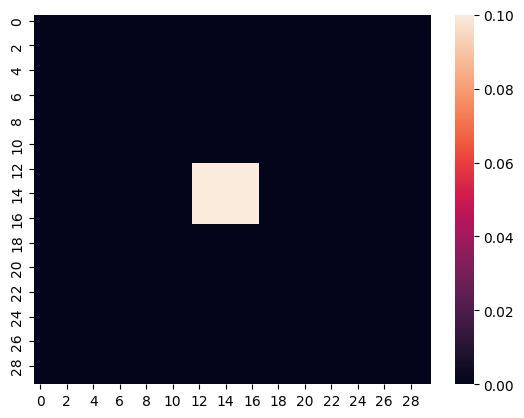

In [41]:
ind = np.zeros((3, 30, 30))
ind[1, 12:17, 12:17] = .1
sns.heatmap(ind[1, :, :])
plt.show()

In [10]:
params = {"species_1":(.3, .1, .9)}

In [15]:
tt = tensor_simulation(individual=ind, parameters=params, num_species=1, num_pairs=0, stop=20, time_step=0.2, max_epoch=100)

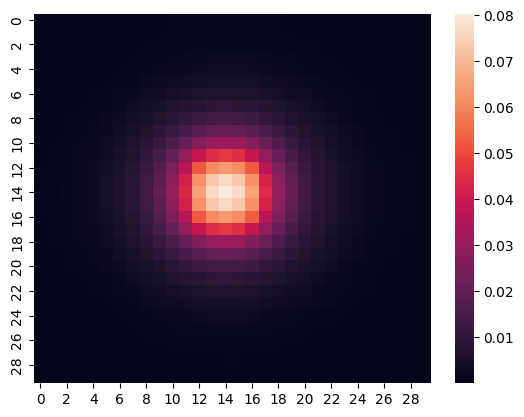

In [16]:
sns.heatmap(tt)
plt.show()

In [27]:
opt = GradientOptimization(
    epochs=30,
    learning_rate=0.01,
    target=tt,
    param_opt=True, 
    compartment_opt=False,
    cost_alpha=0.0,
    cost_beta=0.0,
    cost_kernel_size=3,
    weight_decay=0.01
)

In [28]:
ind_opt = ind
ind_opt[-1, 0, :3] = [.9, .8, .1]
ind_opt[-1, -1, :5] = [1, 0, 100, 20, .2]

In [29]:
ind1, costs = opt.gradient_optimization(individual=ind_opt)

Epoch 1/30, Cost: 8.685962784999505e-05
Epoch 2/30, Cost: 8.326931226061239e-05
Epoch 3/30, Cost: 8.02761974451017e-05
Epoch 4/30, Cost: 7.783310407855202e-05
Epoch 5/30, Cost: 7.587735107081396e-05
Epoch 6/30, Cost: 7.433964587651253e-05
Epoch 7/30, Cost: 7.314697568734599e-05
Epoch 8/30, Cost: 7.22253600332124e-05
Epoch 9/30, Cost: 7.150322944969343e-05
Epoch 10/30, Cost: 7.091507193866231e-05
Epoch 11/30, Cost: 7.040456439928748e-05
Epoch 12/30, Cost: 6.99264948943519e-05
Epoch 13/30, Cost: 6.944722199364265e-05
Epoch 14/30, Cost: 6.894388661283365e-05
Epoch 15/30, Cost: 6.840284520393324e-05
Epoch 16/30, Cost: 6.781780076833343e-05
Epoch 17/30, Cost: 6.718797622739613e-05
Epoch 18/30, Cost: 6.65165164705133e-05
Epoch 19/30, Cost: 6.580918213481106e-05
Epoch 20/30, Cost: 6.50733240325317e-05
Epoch 21/30, Cost: 6.431709305714343e-05
Epoch 22/30, Cost: 6.354883183320434e-05
Epoch 23/30, Cost: 6.277659933175086e-05
Epoch 24/30, Cost: 6.200779049282317e-05
Epoch 25/30, Cost: 6.124882547

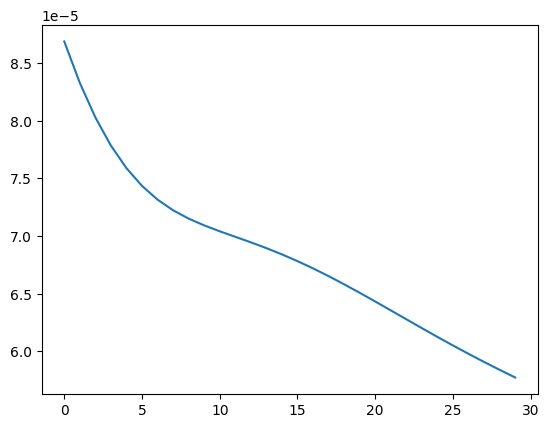

[8.685962784999505e-05, 8.326931226061239e-05, 8.02761974451017e-05, 7.783310407855202e-05, 7.587735107081396e-05, 7.433964587651253e-05, 7.314697568734599e-05, 7.22253600332124e-05, 7.150322944969343e-05, 7.091507193866231e-05, 7.040456439928748e-05, 6.99264948943519e-05, 6.944722199364265e-05, 6.894388661283365e-05, 6.840284520393324e-05, 6.781780076833343e-05, 6.718797622739613e-05, 6.65165164705133e-05, 6.580918213481106e-05, 6.50733240325317e-05, 6.431709305714343e-05, 6.354883183320434e-05, 6.277659933175086e-05, 6.200779049282317e-05, 6.124882547685285e-05, 6.050489560002523e-05, 5.9779764407100075e-05, 5.9075632006109095e-05, 5.839307775824483e-05, 5.773109929316345e-05]


In [35]:
plt.plot(costs)
plt.show()
print(costs)

In [38]:
p = {"species_1":list(ind1[-1, 0, :3].numpy())}
print(p)

{'species_1': [0.85401565244437, 0.7713442921776517, 0.34230569140784284]}


In [39]:
tt1 = tensor_simulation(individual=ind1, parameters=p, num_species=1, num_pairs=0, stop=20, time_step=0.2, max_epoch=100)

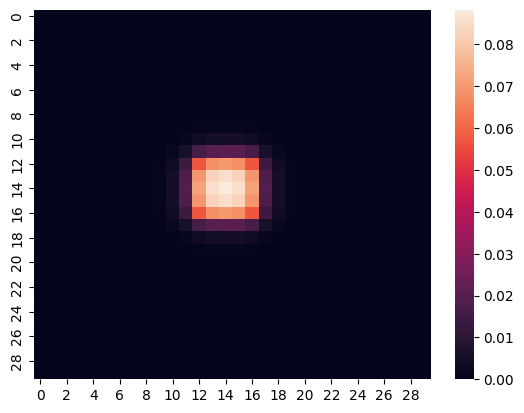

In [40]:
sns.heatmap(tt1)
plt.show()

In [42]:
pp1 = {"species_1":[.9, .8, .1]}
tt2 = tensor_simulation(individual=ind, parameters=pp1, num_species=1, num_pairs=0, stop=20, time_step=0.2, max_epoch=100)

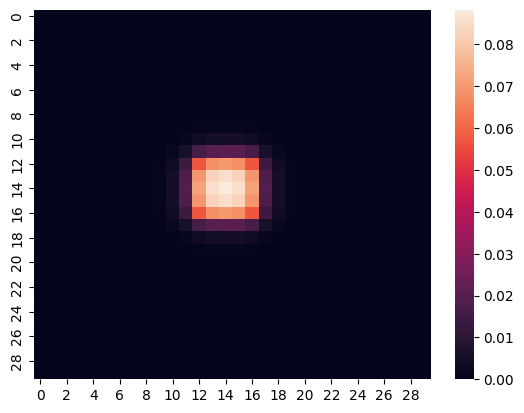

In [43]:
sns.heatmap(tt1)
plt.show()

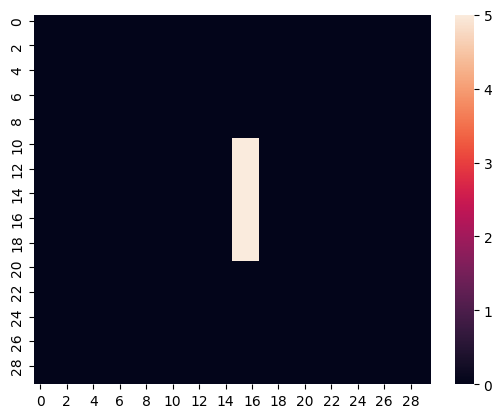

In [70]:
ind = np.zeros((3, 30, 30))
ind[1, 10:20, 15:17] = 5
ind[-1, 0, :3] = [.3, .1, .9]
ind[-1, -1, :5] = [1, 0, 100, 20, .2]
sns.heatmap(ind[1, :, :])
plt.show()

In [78]:
opt1 = GradientOptimization(
    epochs=10,
    learning_rate=0.1,
    target=tt,
    param_opt=True, 
    compartment_opt=False,
    cost_alpha=0.0,
    cost_beta=0.0,
    cost_kernel_size=3,
    weight_decay=0.01
)

In [79]:
ind2, costs2 = opt1.gradient_optimization(individual=ind)

Epoch 1/10, Cost: 0.28588445111267397
Epoch 2/10, Cost: 0.04864486863483208
Epoch 3/10, Cost: 0.008437616723029494
Epoch 4/10, Cost: 0.0005318287041471227
Epoch 5/10, Cost: 0.0002117125421160069
Epoch 6/10, Cost: 0.0002117125421160069
Epoch 7/10, Cost: 0.0002117125421160069
Epoch 8/10, Cost: 0.0002117125421160069
Epoch 9/10, Cost: 0.0002117125421160069
Epoch 10/10, Cost: 0.0002117125421160069


In [84]:
print(ind2[-1, 0, :3])

tf.Tensor([-0.22737101  0.56125259  1.36527777], shape=(3,), dtype=float64)


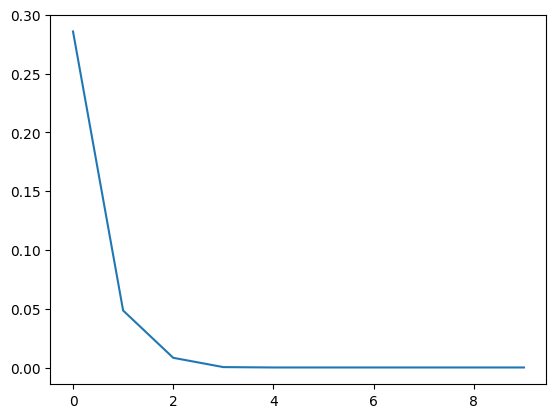

In [80]:
plt.plot(costs2)
plt.show()

In [82]:
ppp = {"species_1": list(ind2[-1, 0, :3].numpy())}
ttt = tensor_simulation(individual=ind2, parameters=ppp, num_species=1, num_pairs=0, stop=20, time_step=0.2, max_epoch=100)

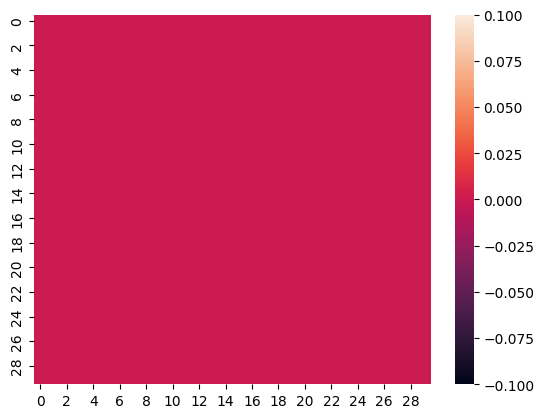

In [83]:
sns.heatmap(ttt)
plt.show()

In [59]:
print(ind2[-1, 0, :3])

tf.Tensor([0.3 0.1 0.9], shape=(3,), dtype=float64)


In [73]:
print(ind2[1, :, :])
print(ind[1, :, :])

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [61]:
def update_parameters(individual, parameters, param_opt, compartment_opt):
        
    num_species = int(individual[-1, -1, 0])
    num_pairs = int(individual[-1, -1, 1])
    pair_start = int(num_species * 2)

    # Update species and pairs parameters
    if param_opt:
        # Update species parameters
        for species in range(1, num_species + 1):
            i = (species - 1) * 2
            individual = tf.tensor_scatter_nd_update(
                individual,
                indices=tf.constant([[individual.shape[0] - 1, i, k] for k in range(3)], dtype=tf.int32),
                updates=parameters[f"species_{species}"]
            )

        # Update pair parameters
        for pair in range(1, num_pairs + 1):
            j = pair_start + (pair - 1) * 2 + 1
            individual = tf.tensor_scatter_nd_update(
                individual,
                indices=tf.constant([[j, 1, k] for k in range(4)], dtype=tf.int32),
                updates=parameters[f"pair_{pair}"]
            )

    # Update initial conditions
    if compartment_opt:
        sp = 1
        for i in range(1, num_species * 2, 2):
            indices_ = []
            updates = tf.reshape(parameters[f"compartment_{sp}"], [-1])
            for row in range(individual[0, :, :].shape[0]):
                for col in range(individual[0, :, :].shape[1]):
                    indices_.append([i, row, col])

            individual = tf.tensor_scatter_nd_update(
                individual,
                indices=indices_,
                updates=updates
            )
            sp += 1

    return individual

In [67]:
ind11 = np.zeros((3, 30, 30))
ind11[1, 10:20, 10:20] = 565
ind11[-1, 0, :3] = [.3, .1, .9]
ind11[-1, -1, :5] = [1, 0, 100, 20, .2]
pp2 = {"compartment_1": tf.Variable(ind11[1, :, :]), "species_1": (12, 13, 42)}
h = update_parameters(individual=tf.convert_to_tensor(ind2), parameters=pp2, param_opt=True, compartment_opt=True)

In [69]:
h[-1, :, :]

<tf.Tensor: shape=(30, 30), dtype=float64, numpy=
array([[ 12. ,  13. ,  42. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
        

In [88]:
opt2 = GradientOptimization(
    epochs=4,
    learning_rate=0.1,
    target=tt,
    param_opt=True, 
    compartment_opt=True,
    cost_alpha=0.0,
    cost_beta=0.0,
    cost_kernel_size=3,
    weight_decay=0.01
)

In [89]:
ind = np.zeros((3, 30, 30))
ind[1, 10:20, 10:20] = 5
ind[-1, 0, :3] = [.1, .4, 1.3]
ind[-1, -1, :5] = [1, 0, 100, 20, .2]

In [90]:
ind3, costs3 = opt2.gradient_optimization(individual=ind)

Epoch 1/4, Cost: 0.053125310979310815
Epoch 2/4, Cost: 0.0002117125421160069
Epoch 3/4, Cost: 0.0002117125421160069
Epoch 4/4, Cost: 0.0002117125421160069


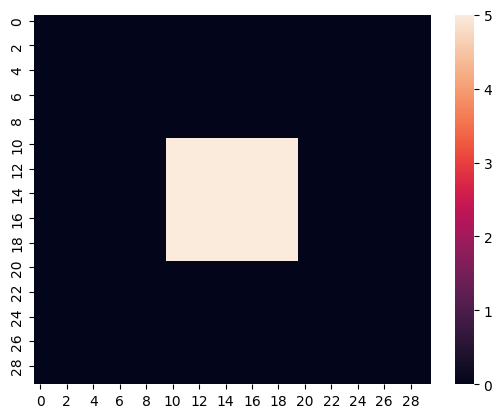

In [91]:
sns.heatmap(ind3[1, :, :])
plt.show()

In [92]:
print(ind3[-1, 0, :])

tf.Tensor(
[-0.1611409   0.65914118  1.55553074  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ], shape=(30,), dtype=float64)
